In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../input/tabular-playground-series-nov-2021/train.csv")
y = df.pop("target")

In [4]:
# y.describe()

so it's a binary classification task with an even mix of positive and negative examples.

In [5]:
# df.describe()

In [6]:
id = df.pop('id')
# pca = PCA()
# df = pd.DataFrame(pca.fit_transform(df))

In [7]:
# df.describe()

In [8]:
# pca.explained_variance_ratio_

In [9]:
ncols = df.shape[1]

dense = layers.Dense(64, activation="relu")

x = dense(inputs)

> The "layer call" action is like drawing an arrow from "inputs" to this layer you created. You're "passing" the inputs to the dense layer, and you get x as the output.

[tensorflow docs](https://www.tensorflow.org/guide/keras/functional)

In [10]:
inputs = keras.Input(shape=(ncols,))
norm = layers.BatchNormalization()
x = norm(inputs)



2021-11-17 19:10:54.020372: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-17 19:10:54.125555: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-17 19:10:54.126236: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-17 19:10:54.127424: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

skipping assignment of dense layer and going straight to "layer call

In [11]:
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(rate=0.25)(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(rate=0.25)(x)
x = layers.Dense(16, activation="relu")(x)
outputs = layers.Dense(1)(x)

In [12]:
model = keras.Model(inputs, outputs, name = "cone_NN")
model.summary()

Model: "cone_NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense (Dense)                (None, 64)                6464      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0   

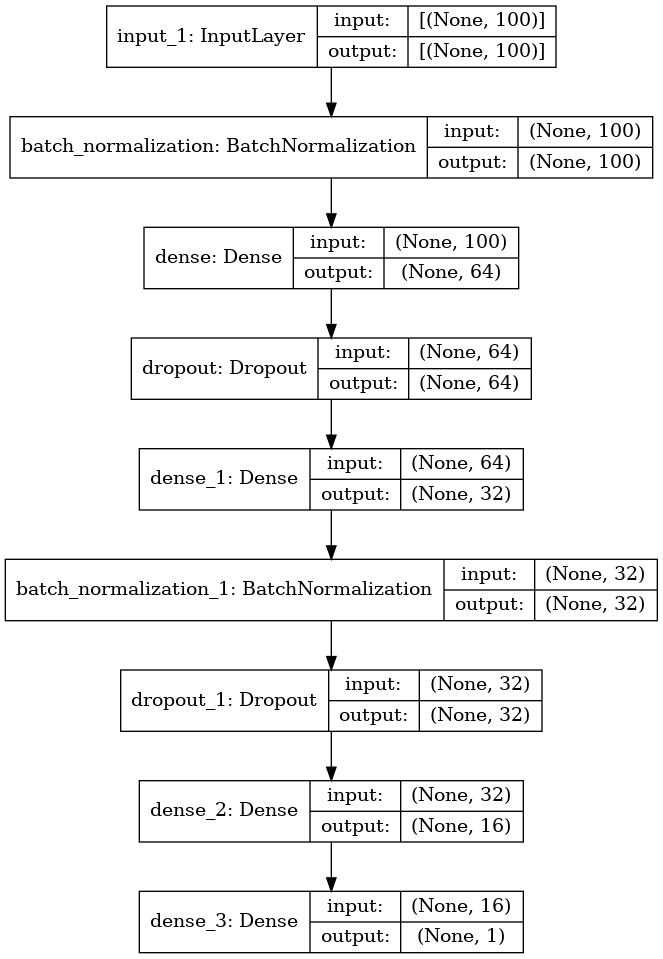

In [13]:
keras.utils.plot_model(model, "cone_NN.png", show_shapes=True)

In [14]:
callback = keras.callbacks.EarlyStopping(
    monitor='val_auc', min_delta=0.001, patience=25,
    mode='max', baseline=None, restore_best_weights=True
)


In [15]:
model.compile(optimizer = keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.AUC(curve='ROC', from_logits=True)]
             )

dont need to scale it, model is using per batch normalization

In [16]:

# pipe = Pipeline([('pca', PCA())])
# pipe.fit(df, y)

In [17]:
history = model.fit(df, y, batch_size = 1000, epochs=1000, callbacks=[callback])

2021-11-17 19:10:59.003046: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/1000
600/600 [==============================] - 4s 4ms/step - loss: 0.6355 - auc: 0.7024
Epoch 2/1000
600/600 [==============================] - 2s 4ms/step - loss: 0.5882 - auc: 0.7441
Epoch 3/1000
600/600 [==============================] - 2s 4ms/step - loss: 0.5801 - auc: 0.7471
Epoch 4/1000
600/600 [==============================] - 3s 4ms/step - loss: 0.5764 - auc: 0.7481
Epoch 5/1000
600/600 [==============================] - 2s 4ms/step - loss: 0.5742 - auc: 0.7487
Epoch 6/1000
600/600 [==============================] - 2s 4ms/step - loss: 0.5735 - auc: 0.7486
Epoch 7/1000
600/600 [==============================] - 2s 4ms/step - loss: 0.5725 - auc: 0.7498
Epoch 8/1000
600/600 [==============================] - 2s 4ms/step - loss: 0.5718 - auc: 0.7515
Epoch 9/1000
600/600 [==============================] - 2s 4ms/step - loss: 0.5713 - auc: 0.7521
Epoch 10/1000
600/600 [==============================] - 2s 4ms/step - loss: 0.5715 - auc: 0.7524
Epoch 11/1000
600/600 [======

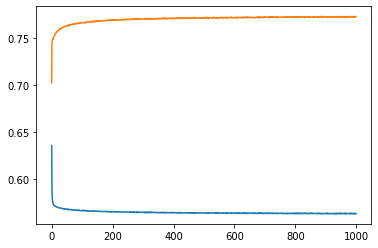

In [18]:
for key in history.history:
    plt.plot(history.history[key])

In [19]:
del df
df = pd.read_csv("../input/tabular-playground-series-nov-2021/test.csv")

In [20]:
id = df.pop('id')
# df = pd.DataFrame(pca.transform(df))
# df = pca.transform(df)
# res = pipe.transform(df)

In [21]:
y_hat = model.predict(df)

In [22]:
y_hat.shape

(540000, 1)

In [23]:
# y_hat = pd.DataFrame(res)
# y_hat.describe()

predicts the logit 

In [24]:
# y_hat = pd.DataFrame(tf.nn.sigmoid(res))

nn sigmoid ran and ran

In [25]:
y_hat_proba = keras.activations.sigmoid(y_hat).numpy()

In [26]:
y_hat_proba = pd.DataFrame(y_hat_proba, index=id)
y_hat_proba.describe()

,0
count,540000.000000
mean,0.488524
std,0.246873
min,0.092610
25%,0.254225
50%,0.360884
75%,0.749953
max,0.919118


In [27]:
y_hat_proba.rename(columns = {0: "target"}, inplace=True)
y_hat_proba.to_csv('./submission.csv')

In [28]:
# res['id'] = id
# res.rename(columns = {1: 'target'}, inplace=True)

In [29]:
# cols = ['id','target']
# res.to_csv('./submission.csv', index=False, columns=cols)

In [30]:
# res.head()